In [1]:
import pandas as pd
import tweepy as tw

In [2]:
import sqlite3

In [3]:
ckey = "F707t7GUGZTxm8ITdRBpWBRq1"

In [4]:
cskey = "vhFpXHTUzVNsGAfxnMP9eF1D4jocAEbgw1SDU2OiCT34YMsrbR"

In [5]:
akey = "1160861491991461888-BiNjW60CKCsuvczvse27Vc3hvNsGyn"

In [6]:
askey = "tVvG9NNwvXIWkVQToaZsCtcHRIS66yz6B4sEZllT4XeaP"

In [7]:
database = sqlite3.connect("ISRO.db")

In [8]:
cur = database.cursor()

In [9]:
auth = tw.OAuthHandler(ckey, cskey)

In [10]:
auth.set_access_token(akey, askey)

In [11]:
api = tw.API(auth)

In [104]:
search ="#ISRO"

In [14]:
date = "2019-8-10"
count = 0

In [105]:
from tweepy import Stream

In [106]:
from tweepy import StreamListener

In [107]:
class Listener(StreamListener):
    def on_status(self, status):
        if hasattr(status, "retweeted_status"):  # Check if Retweet
            try:
                text = status.retweeted_status.extended_tweet["full_text"]
                location = status.user.location
                username = status.user.screen_name
                t_time = status.created_at
                re = "Retweet"
                cur.execute('''INSERT INTO Tweetss (Tweet_time, Name,Tweet_status,Location, Tweet) VALUES (?,?,?,?,?)''',(t_time, username, re, location,text))
                database.commit()
            except AttributeError:
                text = status.retweeted_status.text
                location = status.user.location
                username = status.user.screen_name
                t_time = status.created_at
                re = "Retweet"
                cur.execute('''INSERT INTO Tweetss (Tweet_time, Name,Tweet_status,Location, Tweet) VALUES (?,?,?,?,?)''',(t_time, username, re, location,text))
                database.commit()
        else:
            try:
                text = status.extended_tweet["full_text"]
                location = status.user.location
                username = status.user.screen_name
                t_time = status.created_at
                re = "Tweet"
                cur.execute('''INSERT INTO Tweetss (Tweet_time, Name,Tweet_status,Location, Tweet) VALUES (?,?,?,?,?)''',(t_time, username, re, location,text))
                database.commit()
            except AttributeError:
                text = status.text
                location = status.user.location
                username = status.user.screen_name
                t_time = status.created_at
                re = "Tweet"
                cur.execute('''INSERT INTO Tweetss (Tweet_time, Name,Tweet_status,Location, Tweet) VALUES (?,?,?,?,?)''',(t_time, username, re, location,text))
                database.commit()

In [108]:
lis = Listener()


In [109]:
mystream = tw.Stream(auth = api.auth, listener=lis)
mystream.filter(track = [search])

KeyboardInterrupt: 

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [14]:
#matplotlib inline

In [20]:
import nltk

In [23]:
detect("Hello how are you")

'en'

In [32]:
from langdetect import detect

In [71]:
sql = "SELECT * from Tweets"

In [72]:
cur.execute(sql)

In [73]:
english_tweet = []
tweet_len = []
Time = []
Name = []
Tweet_status = []
Location = []

In [74]:
while True:
    record = cur.fetchone()
    if record[4] == None:
        break
    temp = ''.join(record[4])
    try:
        lang = detect(temp)
        if lang == "en":
            count =count +1
            english_tweet.append(temp)
            tweet_len.append(len(temp))
            Time.append(record[0])
            Name.append(record[1])
            Tweet_status.append(record[2])
            try:
                loc = ''.join(record[3])
                Location.append(loc)
            except:
                Location.append("NaN")
    except:
        print(record)
        


('2019-09-08 05:58:37', 'DatPraS', 'Tweet', None, 'https://t.co/wR7RMHgEc0')
('2019-09-08 06:02:13', 'SRKian___Aayush', 'Retweet', 'Mumbai, India', '🙏🏽❤️ https://t.co/4RzWv5zymH')
('2019-09-08 06:02:36', 'mirdhawala', 'Retweet', 'India', '🙏🏽❤️ https://t.co/4RzWv5zymH')
('2019-09-08 06:03:18', 'manas_bgh', 'Tweet', 'Bangalore,India', '🇮🇳')
('2019-09-08 06:04:03', 'KingsSRKian_', 'Retweet', 'Apni Dunya', '🙏🏽❤️ https://t.co/4RzWv5zymH')
('2019-09-08 06:09:20', 'kkaransangani', 'Tweet', 'Mumbai, India', '🇮🇳')
('2019-09-08 06:11:13', 'Puraana_Paapi', 'Tweet', 'New Delhi, India', '👇👇')
('2019-09-08 06:14:58', 'Diptang27657182', 'Tweet', '🚩HARDCORE🇮🇳NATIONALIST🚩🚩', '✌️✌️\n\n💐🙏\n\n🚩🚩🇮🇳🇮🇳🚩🚩')
('2019-09-08 06:18:40', 'kanhaiyajee12', 'Tweet', None, 'https://t.co/0FHQF2Q4aY')
('2019-09-08 06:20:06', 'im_gautam_gk', 'Tweet', 'Mumbai, India', '🤣')
('2019-09-08 06:20:35', 'kumarswamy_hm', 'Tweet', None, '😁😁')
('2019-09-08 06:27:28', 'hetal_raichura', 'Tweet', None, '❤')
('2019-09-08 06:28:47', 'iamE

TypeError: 'NoneType' object is not subscriptable

In [51]:
sql = "SELECT Tweet_time from Tweets"
cur.execute(sql)
while True:
    record = cur.fetchone()
    if record == None:
        break
    record = ''.join(record)
    Time.append(record)
    

In [52]:
sql = "SELECT Name from Tweets"
cur.execute(sql)
while True:
    record = cur.fetchone()
    if record == None:
        break
    record = ''.join(record)
    Name.append(record)
    

In [55]:
sql = "SELECT Tweet_status from Tweets"
cur.execute(sql)
while True:
    record = cur.fetchone()
    if record == None:
        break
    record = ''.join(record)
    Tweet_status.append(record)
    

In [ ]:
sql = "SELECT Location from Tweets"
cur.execute(sql)
while True:
    record = cur.fetchone()
    
    try:
        record = ''.join(record)
        Location.append(record)
    except:
        Location.append("NaN")

In [81]:
tweet_df = pd.DataFrame(data =list(zip(Time, Name, Tweet_status, english_tweet,tweet_len, Location)), columns = ['Time','Name','Tweet_status','Text', 'Length','Location'])

In [82]:
tweet_df

,Time,Name,Tweet_status,Text,Length,Location
0,2019-09-08 05:58:03,sureshmahesh786,Retweet,"There's nothing like failure in science, we ex...",215,India
1,2019-09-08 05:58:03,Kanpurhunk,Retweet,Upcoming #ISRO Missions~ \n\n&gt; ASTROSAT\n&g...,167,NaN
2,2019-09-08 05:58:05,ankit11101,Retweet,Space is hard. We commend @ISRO’s attempt to l...,245,NaN
3,2019-09-08 05:58:05,kulsaurabh1,Retweet,Hello Pallav Bagla/NDTV\n\nHe's not a politici...,308,"Rahu, Pune, Maharashtra"
4,2019-09-08 05:58:05,Sai2641,Retweet,#Chandrayaan2 mission was a highly complex mis...,251,NaN
5,2019-09-08 05:58:05,matt_herdy,Retweet,"Don't hate Good things, look my comment sectio...",150,"London, England"
6,2019-09-08 05:58:05,imSatyajeet18,Retweet,Upcoming #ISRO Missions~ \n\n&gt; ASTROSAT\n&g...,167,"Balasore, India"
7,2019-09-08 05:58:07,tripathi622,Retweet,@peaceforchange ISRO holds the World Record to...,311,Prayagraj bharat
8,2019-09-08 05:58:07,KapilSi11509302,Tweet,"Really entire Nation is with ISRO, go ahead wi...",83,India
9,2019-09-08 05:58:07,lukagodric,Retweet,Space is hard. We commend @ISRO’s attempt to l...,245,"Pune, India"


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


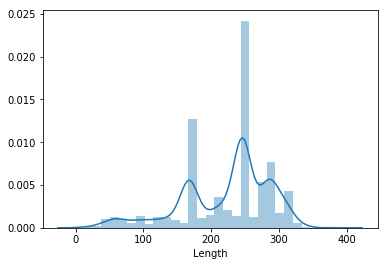

In [83]:
sns.distplot(tweet_df['Length'])

In [84]:
tweet_df.describe()

,Length
count,4849.000000
mean,222.511033
std,65.451736
min,12.000000
25%,167.000000
50%,245.000000
75%,276.000000
max,385.000000


In [85]:
from nltk.corpus import stopwords

In [89]:
def text_processing(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostop = [word for word in nopunc if word.lower not in stopwords.words('english')]
    nostop = ''.join(nostop)
    return nostop


In [90]:
tweet_df['Text'] = tweet_df['Text'].apply(text_processing)

In [88]:
import string

In [91]:
tweet_df

,Time,Name,Tweet_status,Text,Length,Location
0,2019-09-08 05:58:03,sureshmahesh786,Retweet,Theres nothing like failure in science we expe...,215,India
1,2019-09-08 05:58:03,Kanpurhunk,Retweet,Upcoming ISRO Missions \n\ngt ASTROSAT\ngt Adi...,167,NaN
2,2019-09-08 05:58:05,ankit11101,Retweet,Space is hard We commend ISRO’s attempt to lan...,245,NaN
3,2019-09-08 05:58:05,kulsaurabh1,Retweet,Hello Pallav BaglaNDTV\n\nHes not a politician...,308,"Rahu, Pune, Maharashtra"
4,2019-09-08 05:58:05,Sai2641,Retweet,Chandrayaan2 mission was a highly complex miss...,251,NaN
5,2019-09-08 05:58:05,matt_herdy,Retweet,Dont hate Good things look my comment section ...,150,"London, England"
6,2019-09-08 05:58:05,imSatyajeet18,Retweet,Upcoming ISRO Missions \n\ngt ASTROSAT\ngt Adi...,167,"Balasore, India"
7,2019-09-08 05:58:07,tripathi622,Retweet,peaceforchange ISRO holds the World Record to ...,311,Prayagraj bharat
8,2019-09-08 05:58:07,KapilSi11509302,Tweet,Really entire Nation is with ISRO go ahead wit...,83,India
9,2019-09-08 05:58:07,lukagodric,Retweet,Space is hard We commend ISRO’s attempt to lan...,245,"Pune, India"


In [61]:
print(cur.execute(sql))

In [80]:
len(tweet_len)

4849

In [79]:
len(english_tweet)

4849

In [64]:
record

'🙏🏽❤️ https://t.co/4RzWv5zymH'

In [37]:
cur.execute("SELECT * FROM Tweets WHERE Name = 'sureshmahesh786';")

In [61]:
record = cur.fetchone()

In [62]:
record[0]

TypeError: 'NoneType' object is not subscriptable

In [63]:
record[1]

TypeError: 'NoneType' object is not subscriptable

In [64]:
record[2]

TypeError: 'NoneType' object is not subscriptable

In [65]:
record[3]

TypeError: 'NoneType' object is not subscriptable

In [77]:
record

In [78]:
record

In [95]:
tweet_df.to_csv('final.csv')

In [99]:
temp = tweet_df.drop_duplicates(subset="Text")

In [100]:
len(temp)

836

In [101]:
temp

,Time,Name,Tweet_status,Text,Length,Location
0,2019-09-08 05:58:03,sureshmahesh786,Retweet,Theres nothing like failure in science we expe...,215,India
1,2019-09-08 05:58:03,Kanpurhunk,Retweet,Upcoming ISRO Missions \n\ngt ASTROSAT\ngt Adi...,167,NaN
2,2019-09-08 05:58:05,ankit11101,Retweet,Space is hard We commend ISRO’s attempt to lan...,245,NaN
3,2019-09-08 05:58:05,kulsaurabh1,Retweet,Hello Pallav BaglaNDTV\n\nHes not a politician...,308,"Rahu, Pune, Maharashtra"
4,2019-09-08 05:58:05,Sai2641,Retweet,Chandrayaan2 mission was a highly complex miss...,251,NaN
5,2019-09-08 05:58:05,matt_herdy,Retweet,Dont hate Good things look my comment section ...,150,"London, England"
7,2019-09-08 05:58:07,tripathi622,Retweet,peaceforchange ISRO holds the World Record to ...,311,Prayagraj bharat
8,2019-09-08 05:58:07,KapilSi11509302,Tweet,Really entire Nation is with ISRO go ahead wit...,83,India
11,2019-09-08 05:58:07,Congress_Army,Tweet,He must be kicked out,21,NaN
12,2019-09-08 05:58:07,Tomboy_Diaries,Retweet,Sometimes we don’t land or arrive at the desti...,250,"New Delhi, India"


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


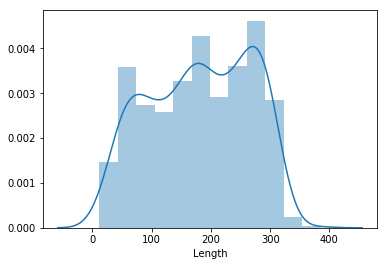

In [102]:
sns.distplot(temp['Length'])

In [103]:
temp.to_csv("WithoutDuplicate.csv")

In [55]:
tweet_df = pd.read_csv("WithoutDuplicate.csv")

In [13]:
tweet_df

,Time,Name,Tweet_status,Text,Length,Location
0,08-09-19 5:58,sureshmahesh786,Retweet,Theres nothing like failure in science we expe...,215,India
1,08-09-19 5:58,Kanpurhunk,Retweet,Upcoming ISRO Missions \r\n\r\ngt ASTROSAT\r\n...,167,NaN
2,08-09-19 5:58,ankit11101,Retweet,Space is hard We commend ISRO’s attempt to lan...,245,NaN
3,08-09-19 5:58,kulsaurabh1,Retweet,Hello Pallav BaglaNDTV\r\n\r\nHes not a politi...,308,"Rahu, Pune, Maharashtra"
4,08-09-19 5:58,Sai2641,Retweet,Chandrayaan2 mission was a highly complex miss...,251,NaN
5,08-09-19 5:58,matt_herdy,Retweet,Dont hate Good things look my comment section ...,150,"London, England"
6,08-09-19 5:58,tripathi622,Retweet,peaceforchange ISRO holds the World Record to ...,311,Prayagraj bharat
7,08-09-19 5:58,KapilSi11509302,Tweet,Really entire Nation is with ISRO go ahead wit...,83,India
8,08-09-19 5:58,Congress_Army,Tweet,He must be kicked out,21,NaN
9,08-09-19 5:58,Tomboy_Diaries,Retweet,Sometimes we don’t land or arrive at the desti...,250,"New Delhi, India"


In [27]:
text_df = []
for i in tweet_df['Text']:
    text_df.append(i)

In [15]:
text = ''
text_df = []
for i in tweet_df['Text']:
    for j in i:
        if((j>='a'and j<='z') or (j>'A' and j<'Z') or (j == ' ')):
            text = text + j
    text_df.append(text)


In [14]:
import string

In [17]:
print("hello")

hello


In [56]:
tweet_df

,Time,Name,Tweet_status,Text,Length,Location
0,08-09-19 5:58,sureshmahesh786,Retweet,Theres nothing like failure in science we expe...,215,India
1,08-09-19 5:58,Kanpurhunk,Retweet,Upcoming ISRO Missions \r\n\r\ngt ASTROSAT\r\n...,167,NaN
2,08-09-19 5:58,ankit11101,Retweet,Space is hard We commend ISRO’s attempt to lan...,245,NaN
3,08-09-19 5:58,kulsaurabh1,Retweet,Hello Pallav BaglaNDTV\r\n\r\nHes not a politi...,308,"Rahu, Pune, Maharashtra"
4,08-09-19 5:58,Sai2641,Retweet,Chandrayaan2 mission was a highly complex miss...,251,NaN
5,08-09-19 5:58,matt_herdy,Retweet,Dont hate Good things look my comment section ...,150,"London, England"
6,08-09-19 5:58,tripathi622,Retweet,peaceforchange ISRO holds the World Record to ...,311,Prayagraj bharat
7,08-09-19 5:58,KapilSi11509302,Tweet,Really entire Nation is with ISRO go ahead wit...,83,India
8,08-09-19 5:58,Congress_Army,Tweet,He must be kicked out,21,NaN
9,08-09-19 5:58,Tomboy_Diaries,Retweet,Sometimes we don’t land or arrive at the desti...,250,"New Delhi, India"


In [40]:
text_df = []
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
for i in tweet_df['Text']:
    text_df.append(emoji_pattern.sub(r'', i))

In [53]:
count = 1
for i in text_df:
    
    tweet_df.replace({'Text', count}, i, inplace = True)
    count= count +1

In [33]:
i = tweet_df['Text'][14]

In [34]:
type(i)

str

In [35]:
detect(i)

'en'